# Hall effect

In [1]:
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.constants import physical_constants
from scipy.optimize import curve_fit
from scipy import stats
import pandas as pd
%matplotlib inline

In [2]:
path_figs = './Figs/'
save_figs = False
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])
def save_fig(fig, name):
    fig.savefig(path_figs + name + '.png', dpi=300)
    fig.savefig(path_figs + name + '.eps', dpi=300)

## Calibration magnetic field

Calibration of magnetic sensor is: 0.1172 T/mV at 10 mA

In [3]:
I1 = np.arange(0,16)
V1 = np.array([0.060,0.405,0.743,1.098,1.437,1.775,2.100,2.432,2.766,3.080,3.419,3.739,4.051,4.374,4.682,4.977])
c = 0.1172
B = V1[13] * c

In [4]:
err_B = np.abs(V1) * 5e-5 + np.abs(c) * 5e-4

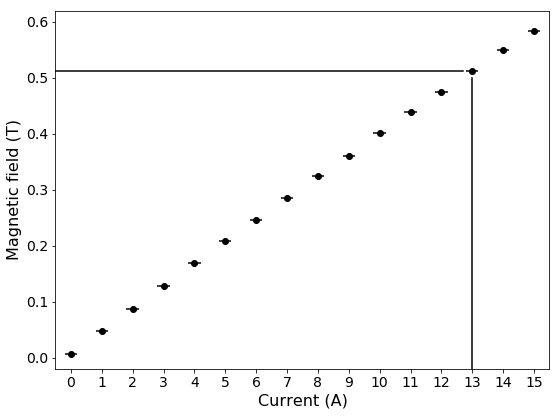

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(I1, c*V1, yerr=err_B, xerr=.2, fmt='ko')
ax.plot([-1,12.7], [B, B], 'k-')
ax.plot([13,13], [-1, .5], 'k-')
ax.set_xlabel('Current (A)', fontsize=16)
ax.set_ylabel('Magnetic field (T)', fontsize=16)
ax.set_xticks(np.arange(0, 16, step=1))
ax.set_xbound(-.5,15.5)
ax.set_ybound(-.02,.62)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Magnetic_field_vs_current')

In [6]:
print(B)

0.5126328


## Check Ohmic behaviour

In [7]:
I2 = np.arange(10,160,10)
V2 = np.array([40.7,81.1,122.2,162.7,202.9,243.2,283.6,324.7,365.1,405.3,445.5,485.8,527.0,567.3,607.5])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(I2, V2)
print(slope2)
print(intercept2)
print(r_value2)
print(p_value2)
print(std_err2)

4.048107142857143
0.4580952380952681
0.99999885689099
4.6869276251004674e-38
0.001697616221964907


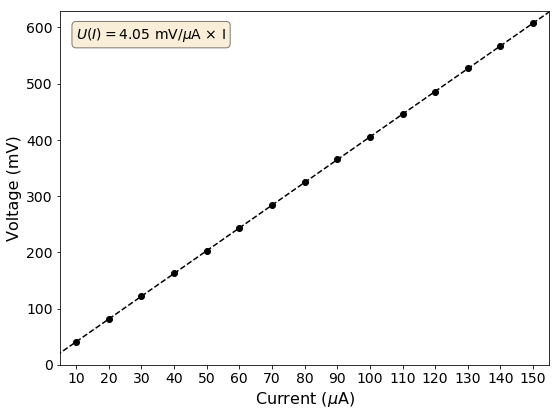

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(I2, V2, yerr=.5, xerr=.05, fmt='ko')
x2 = np.linspace(0,160)
y2 = x2 * slope2 + intercept2
ax.plot(x2, y2, 'k--')
ax.set_xlabel('Current ($\mu$A)', fontsize=16)
ax.set_ylabel('Voltage (mV)', fontsize=16)
ax.set_xbound(5,155)
ax.set_ybound(0,630)
ax.set_xticks(np.arange(10,160,10))
ax.text(10,580, r"$U(I)={:.2f}$ mV/$\mu$A $\times$ I".format(slope2), fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Voltage_vs_current_ohmic_test')

## Orientation of the sample

In [9]:
angle = np.arange(-90,100,10)
V = np.array([-9.22,-9.01,-8.82,-8.63,-8.45,-8.3,-8.17,-8.07,-8.01,-7.98,-7.98,-8.02,-8.10,-8.21,-8.35,-8.52,-8.7,-8.89,-9.09])

In [10]:
def fit_fun(angle, u0, u_offset, phi):
    return u0 * np.cos(angle + phi) + u_offset

In [11]:
popt, pcov = curve_fit(fit_fun, np.deg2rad(angle), V)

In [12]:
print(popt)
print(pcov)

[ 1.18225737 -9.15857643 -0.05483522]
[[ 1.03952611e-05 -6.25900777e-06  3.79884981e-07]
 [-6.25900777e-06  4.93574913e-06 -2.90595913e-07]
 [ 3.79884981e-07 -2.90595913e-07  1.60096857e-06]]


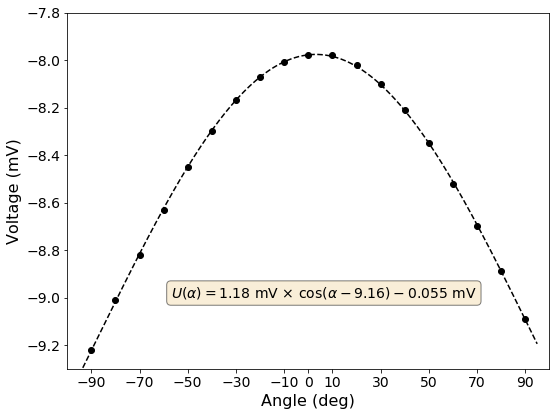

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(angle, V, yerr=5e-3, xerr=5e-1, fmt='ko')
x = np.deg2rad(np.arange(-95,95,.1))
y = fit_fun(x, *popt)
ax.plot(np.rad2deg(x), y, 'k--')
#ax.plot([5,5], [-12,-7.97], 'k-')
ax.set_xlabel('Angle (deg)', fontsize=16)
ax.set_ylabel('Voltage (mV)', fontsize=16)
ax.set_xbound(-100,100)
ax.set_ybound(-9.3,-7.8)
ax.set_xticks([-90,-70,-50,-30,-10,0,10,30,50,70,90])
ax.text(-57,-9, r"$U(\alpha)={:.2f}$ mV $\times$ $\cos(\alpha {:.2f}) {:.3f}$ mV".format(*popt),
        fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Voltage_vs_angle')

## Dataset preparation

In [23]:
data1 = np.loadtxt('measurements.txt', comments='#')
T1 = data1[:, 0]
U_t1 = data1[:, 2]
U_off1 = data1[:, 1]
U_Hall1 = U_t1 - U_off1
U_op1 = data1[:, 3]
U_pm1 = data1[:, 4]
R_mn_op1 = np.abs(U_op1 / .1)
R_no_pm1 = np.abs(U_pm1 / .1)

In [24]:
err_R_mn_op1 = 1/.1 * 5e-3 + np.abs(U_op1) / .1**2 * 5e-4
err_R_no_pm1 = 1/.1 * 5e-3 + np.abs(U_pm1) / .1**2 * 5e-4

Data from other group

In [25]:
data2 = pd.read_excel('Data_Lettner_Schuele.xlsx', header=None,
                       names=['Temperature', 'Hall_Total_Voltage', 'Hall_Offset_Voltage', 'Voltage_OP', 'Voltage_PM'],
                       usecols='B:F', dtype=np.float, skiprows=6)

In [26]:
data2.head()

,Temperature,Hall_Total_Voltage,Hall_Offset_Voltage,Voltage_OP,Voltage_PM
0,82.2,65.5,86.9,-159.6,-245.2
1,87.3,48.8,56.2,-107.0,-163.0
2,96.0,36.0,42.0,-84.0,-127.0
3,102.4,29.7,34.7,-67.0,-102.0
4,109.0,25.1,29.4,-58.0,-87.0


Plots of both our data and other group's data

In [27]:
T2 = data2['Temperature'].values
U_t2 = -data2['Hall_Total_Voltage'].values
U_off2 = -data2['Hall_Offset_Voltage'].values
U_Hall2 = U_t2 - U_off2
U_op2 = data2['Voltage_OP'].values
U_pm2 = data2['Voltage_PM'].values
# Fix missing sign in their data
U_pm2[26] *= -1
R_mn_op2 = np.abs(U_op2 / .1)
R_no_pm2 = np.abs(U_pm2 / .1)

In [28]:
err_R_mn_op2 = 1/.1 * 5e-3 + np.abs(U_op2) / .1**2 * 5e-4
err_R_no_pm2 = 1/.1 * 5e-3 + np.abs(U_pm2) / .1**2 * 5e-4

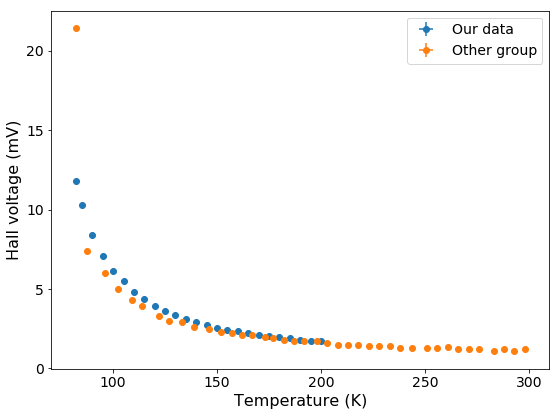

In [29]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(T1, U_Hall1, yerr=.1, xerr=1, fmt='o', label='Our data')
ax.errorbar(T2, U_Hall2, yerr=.1, xerr=1, fmt='o', label='Other group')
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('Hall voltage (mV)', fontsize=16)
ax.legend(loc=0, fontsize=14)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Hall_voltage_vs_Temperature_both_datasets')

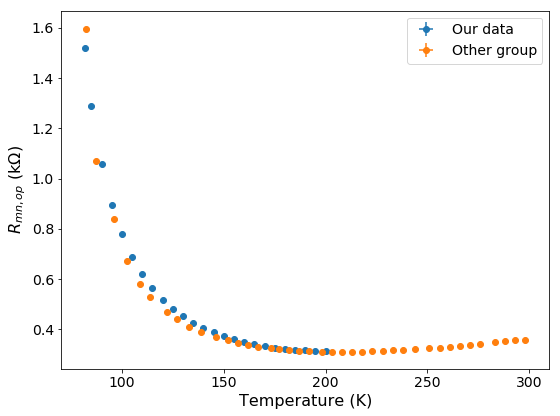

In [30]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(T1, R_mn_op1/1000, yerr=err_R_mn_op1/1000, xerr=1, fmt='o', label='Our data')
ax.errorbar(T2, R_mn_op2/1000, yerr=err_R_mn_op2/1000, xerr=1, fmt='o', label='Other group')
ax.legend(loc=0, fontsize=14)
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('$R_{mn,op}$ (k$\Omega$)', fontsize=16)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'R_mn_op_vs_Temperature_both_datasets')

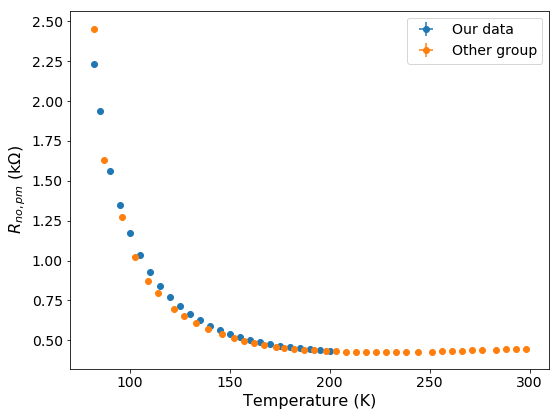

In [31]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(T1, R_no_pm1/1000, yerr=err_R_no_pm1/1000, xerr=1, fmt='o', label='Our data')
ax.errorbar(T2, R_no_pm2/1000, yerr=err_R_no_pm2/1000, xerr=1, fmt='o', label='Other group')
ax.legend(loc=0, fontsize=14)
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('$R_{no,pm}$ (k$\Omega$)', fontsize=16)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'R_no_pm_vs_Temperature_both_datasets')

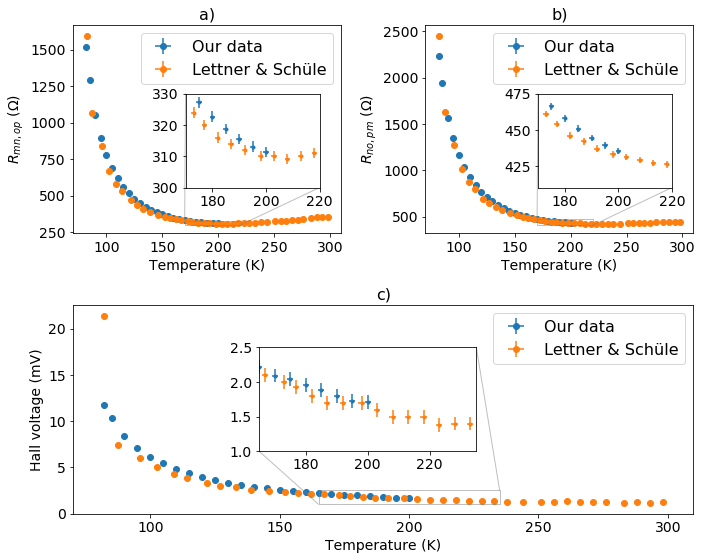

In [32]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('a)', fontsize=16)
ax1.errorbar(T1, R_mn_op1, yerr=err_R_mn_op1, xerr=1, fmt='o', label='Our data')
ax1.errorbar(T2, R_mn_op2, yerr=err_R_mn_op2, xerr=1, fmt='o', label='Lettner & Schüle')
ax1.legend(loc=0, fontsize=16)
ax1.set_xlabel('Temperature (K)', fontsize=14)
ax1.set_ylabel('$R_{mn,op}$ ($\Omega$)', fontsize=14)
# Zoom area
axins = ax1.inset_axes([.42, .22, .5, .45], )
axins.errorbar(T1, R_mn_op1, yerr=err_R_mn_op1, xerr=1, fmt='.')
axins.errorbar(T2, R_mn_op2, yerr=err_R_mn_op2, xerr=1, fmt='.')
axins.set_xlim(170, 220)
axins.set_ylim(300, 330)
ax1.indicate_inset_zoom(axins)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('b)', fontsize=16)
ax2.errorbar(T1, R_no_pm1, yerr=err_R_no_pm1, xerr=1, fmt='o', label='Our data')
ax2.errorbar(T2, R_no_pm2, yerr=err_R_no_pm2, xerr=1, fmt='o', label='Lettner & Schüle')
ax2.legend(loc=0, fontsize=16)
ax2.set_xlabel('Temperature (K)', fontsize=14)
ax2.set_ylabel('$R_{no,pm}$ ($\Omega$)', fontsize=14)
# Zoom area
axins = ax2.inset_axes([.42, .22, .5, .45], )
axins.errorbar(T1, R_no_pm1, yerr=err_R_no_pm1, xerr=1, fmt='.')
axins.errorbar(T2, R_no_pm2, yerr=err_R_no_pm2, xerr=1, fmt='.')
axins.set_xlim(170, 220)
axins.set_ylim(410, 475)
ax2.indicate_inset_zoom(axins)

ax3 = fig.add_subplot(gs[1, :])
ax3.set_title('c)', fontsize=16)
ax3.errorbar(T1, U_Hall1, yerr=.1, xerr=1, fmt='o', label='Our data')
ax3.errorbar(T2, U_Hall2, yerr=.1, xerr=1, fmt='o', label='Lettner & Schüle')
ax3.set_xlabel('Temperature (K)', fontsize=14)
ax3.set_ylabel('Hall voltage (mV)', fontsize=14)
ax3.legend(loc=0, fontsize=16)
# Zoom area
axins = ax3.inset_axes([.3, .3, .35, .5], )
axins.errorbar(T1, U_Hall1, yerr=.1, xerr=1, fmt='.')
axins.errorbar(T2, U_Hall2, yerr=.1, xerr=1, fmt='.')
axins.set_xlim(165, 235)
axins.set_ylim(1, 2.5)
ax3.indicate_inset_zoom(axins)

plt.tight_layout()

if save_fig:
    save_fig(fig, 'comparison_datasets')

Combined data from our measurements and the other group

In [33]:
cut = 21

In [34]:
T3 = np.concatenate((T1, T2[cut:]))
U_t3 = np.concatenate((U_t1, U_t2[cut:]))
U_off3 = np.concatenate((U_off1, U_off2[cut:]))
U_Hall3 = U_t3 - U_off3
U_op3 = np.concatenate((U_op1, U_op2[cut:]))
U_pm3 = np.concatenate((U_pm1, U_pm2[cut:]))
R_mn_op3 = np.abs(U_op3 / .1)
R_no_pm3 = np.abs(U_pm3 / .1)
err_R_mn_op3 = 1/.1 * 5e-3 + np.abs(U_op3) / .1**2 * 5e-4
err_R_no_pm3 = 1/.1 * 5e-3 + np.abs(U_pm3) / .1**2 * 5e-4

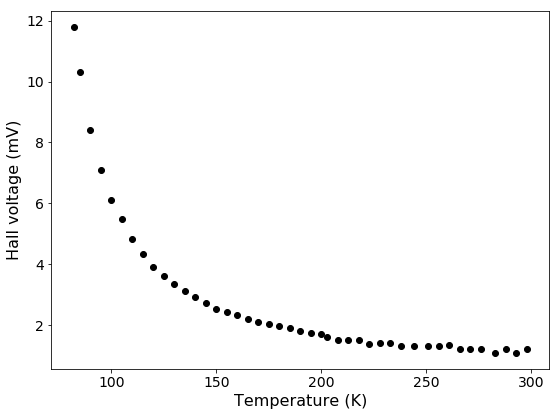

In [35]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, U_Hall3, 'ko')
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('Hall voltage (mV)', fontsize=16)
plt.tight_layout()

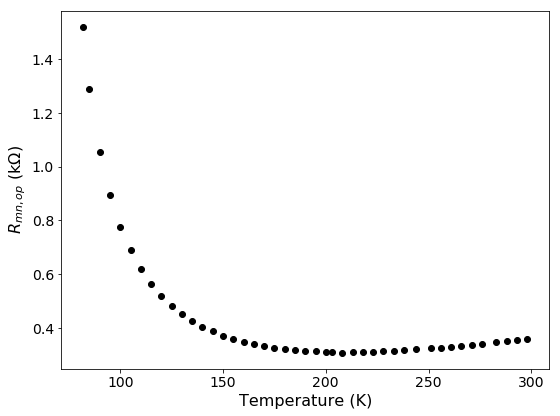

In [36]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, R_mn_op3/1000, 'ko')
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('$R_{mn,op}$ (k$\Omega$)', fontsize=16)
plt.tight_layout()

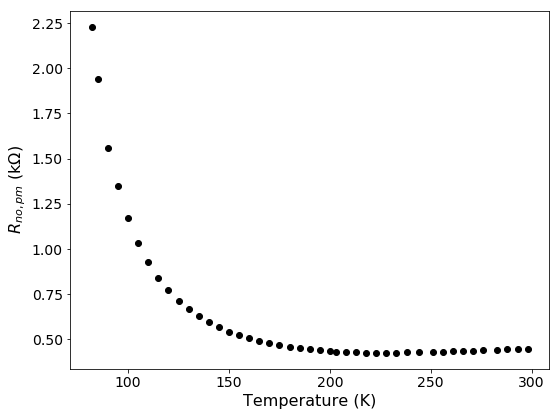

In [37]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, R_no_pm3/1000, 'ko')
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('$R_{no,pm}$ (k$\Omega$)', fontsize=16)
plt.tight_layout()

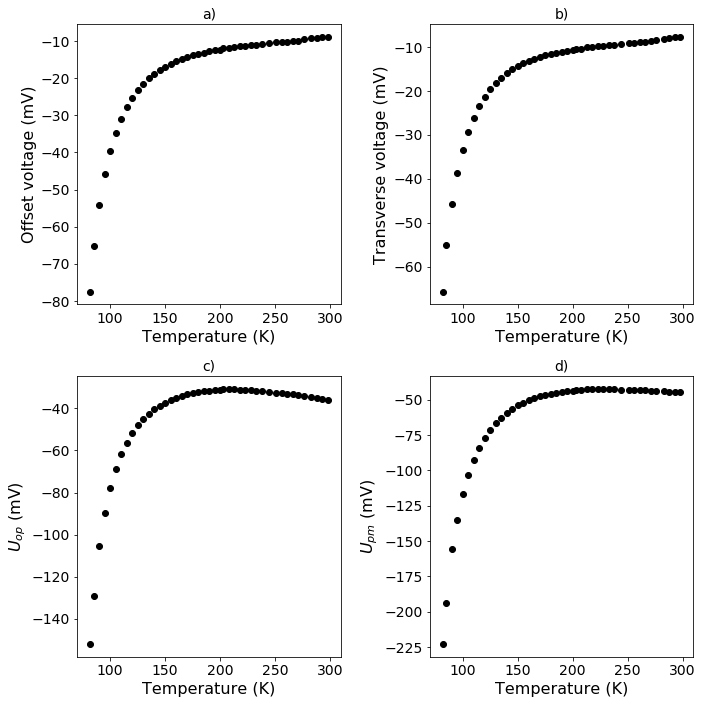

In [38]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('a)', fontsize=14)
ax1.errorbar(T3, U_off3, yerr=5e-3, xerr=1, fmt='ko')
ax1.set_xlabel('Temperature (K)', fontsize=16)
ax1.set_ylabel('Offset voltage (mV)', fontsize=16)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('b)', fontsize=14)
ax2.errorbar(T3, U_t3, yerr=5e-3, xerr=1, fmt='ko')
ax2.set_xlabel('Temperature (K)', fontsize=16)
ax2.set_ylabel('Transverse voltage (mV)', fontsize=16)

ax3 = fig.add_subplot(gs[1, 0])
ax3.set_title('c)', fontsize=14)
ax3.errorbar(T3, U_op3, yerr=1e-3, xerr=1, fmt='ko')
ax3.set_xlabel('Temperature (K)', fontsize=16)
ax3.set_ylabel(r'$U_{op}$ (mV)', fontsize=16)

ax4 = fig.add_subplot(gs[1, 1])
ax4.set_title('d)', fontsize=14)
ax4.errorbar(T3, U_pm3, yerr=1e-3, xerr=1, fmt='ko')
ax4.set_xlabel('Temperature (K)', fontsize=16)
ax4.set_ylabel(r'$U_{pm}$ (mV)', fontsize=16)

plt.tight_layout()

if save_figs:
    save_fig(fig, 'final_dataset')

In [39]:
data3 = pd.DataFrame(data={'Temperature':T3, 'Hall_Voltage':U_Hall3, 'R_mn_op':R_mn_op3, 'R_no_pm':R_no_pm3})

In [40]:
data3.head()

,Temperature,Hall_Voltage,R_mn_op,R_no_pm
0,82.0,11.8,1520.0,2230.0
1,85.0,10.3,1290.0,1940.0
2,90.0,8.4,1056.0,1560.0
3,95.0,7.1,895.1,1350.0
4,100.0,6.1,777.5,1171.0


In [41]:
#data3.to_csv('Combined_dataset.csv')
#data3.to_excel('Combined_dataset.xlsx')

## Determination of $p$ and $\mu$

Definition of physical constants

In [54]:
kB = physical_constants['Boltzmann constant'][0] # J / K
kB_eV = physical_constants['Boltzmann constant in eV/K'][0] # eV / K
m0 = physical_constants['electron mass'][0] # kg
h = physical_constants['Planck constant'][0] # J·s
electron_charge = physical_constants['elementary charge'][0] # C
eV = physical_constants['electron volt'][0] # J

In [184]:
def Nv(x):
    # eq. 10
    return 2 * (2 * np.pi * 0.689 * m0 * 1000 * kB / (h**2 * x))**(3/2) * 1e-6 # cm^-3

def p_full(x, p1, p2):
    # eq. 25
    return 2 * p1 * 1e18 / (1 + np.sqrt(1 + 16 * p1 * 1e18 / Nv(x) * np.exp(p2 * 1e-21 * x / (1000 * kB)))) # cm^-3

def p_approx(x, p1, p2):
    # eq. 26
    return .5 * np.sqrt(p1 * 1e18 * Nv(x)) * np.exp(- p2 * 1e-21 * x /(2000 * kB))

def ni(x):
    # eq. 14
    mt = 0.1905 * m0
    ml = 0.9163 * m0
    mde = (ml * mt**2)**(1/3)
    mdh = 0.689 * m0
    Eg = 1.12 * eV
    return 4.9e15 * (mde * mdh / m0**2)**(3/4) * (1000 / x)**(3/2) * np.exp(- Eg * x / (2000 * kB))

In [176]:
d = 3.1e-5 # cm
err_d = 5e-7
I0 = 0.1e-3 # A

In [177]:
# In cm^3 / C
R_H3 = U_Hall3 * d / (B * I0) * 10
R_H2 = U_Hall2 * d / (B * I0) * 10
R_H1 = U_Hall1 * d / (B * I0) * 10

In [178]:
err_R_H3 = d / (B * I0) * 5e-7
err_R_H2 = d / (B * I0) * 5e-7 + U_Hall2 / (B * I0) * 5e-9
err_R_H1 = d / (B * I0) * 5e-7 + U_Hall1 / (B * I0) * 5e-9

In [179]:
p3 = 1 / (electron_charge * R_H3)
p2 = 1 / (electron_charge * R_H2)
p1 = 1 / (electron_charge * R_H1)

In [180]:
err_p3 = 1 / (electron_charge * d) * B * I0 / R_H3**2 * 5e-17
err_p2 = 1 / (electron_charge * d) * B * I0 / R_H2**2 * 5e-17
err_p1 = 1 / (electron_charge * d) * B * I0 / R_H1**2 * 5e-17

In [213]:
1000/T3[:-8]

array([12.19512195, 11.76470588, 11.11111111, 10.52631579, 10.        ,
        9.52380952,  9.09090909,  8.69565217,  8.33333333,  8.        ,
        7.69230769,  7.40740741,  7.14285714,  6.89655172,  6.66666667,
        6.4516129 ,  6.25      ,  6.06060606,  5.88235294,  5.71428571,
        5.55555556,  5.40540541,  5.26315789,  5.12820513,  5.        ,
        4.92610837,  4.80769231,  4.69483568,  4.58715596,  4.48430493,
        4.38596491,  4.29184549,  4.20168067,  4.09836066,  3.98406375,
        3.90625   ])

In [221]:
popt1, pcov1 = curve_fit(p_full, 1000/T3[:-10], p3[:-10], p0=(1.7, 4.8))
print(popt1)
print(pcov1)
perr1 = np.sqrt(np.diag(pcov1))
print(perr1)

[1.94586035 5.21160494]
[[0.00139365 0.00247302]
 [0.00247302 0.00495267]]
[0.03733158 0.0703752 ]


In [222]:
print(popt1[0] * 1e18)
print(popt1[1] * 1e-21)
print(popt1[1] * 1e-21 / eV * 1e3)

1.9458603481261135e+18
5.2116049386701305e-21
32.52827978520787


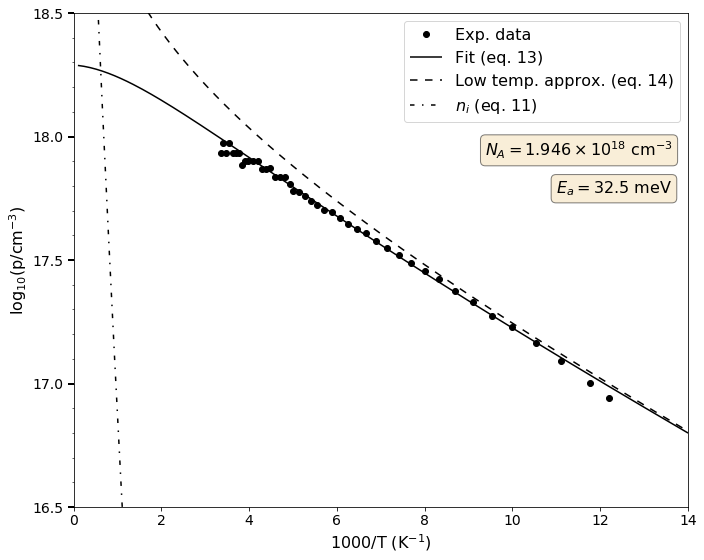

In [228]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(1000/T3, np.log10(p3), 'ko', label='Exp. data')

x = np.linspace(.1, 14, 200)
ax.plot(x, np.log10(p_full(x, *popt1)), color='black', linestyle=linestyles['solid'], label='Fit (eq. 13)')
ax.plot(x, np.log10(p_approx(x, *popt1)), color='black', linestyle=linestyles['dashed'], label='Low temp. approx. (eq. 14)')
ax.plot(x, np.log10(ni(x)), color='black', linestyle=linestyles['dashdotted'], label=r'$n_i$ (eq. 11)')

ax.text(.67,.71, r"$N_A = 1.946\times 10^{18}$ cm$^{-3}$",
        fontsize=16, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), transform=ax.transAxes)

ax.text(.785,.635, r"$E_a = 32.5$ meV",
        fontsize=16, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), transform=ax.transAxes)


ax.set_xlabel('1000/T (K$^{-1}$)', fontsize=16)
ax.set_ylabel('$\log_{10}($p/cm$^{-3}$)', fontsize=16)
ax.set_yticks(np.arange(16.5,18.6,.5))
ax.tick_params(axis='y', which='major', direction='out', length=6, width=2)
ax.set_yticks(np.arange(16.5,19,.1), minor=True)
ax.set_xbound(0,14)
ax.set_ybound(16.5,18.5)
ax.legend(loc=1, fontsize=16)
plt.tight_layout() 
if save_figs:
    save_fig(fig, 'carrier_density')

Resistivity $\rho$

In [48]:
def vdP(R, rho):
    return np.exp(-np.pi * R[0] * d / rho) + np.exp(-np.pi * R[1] * d / rho) - 1

In [49]:
def resistivity(R1, R2, d):
    f = 1 - ((R1 - R2) / (R1 + R2))**2 * np.log(2) / 2 - ((R1 - R2) / (R1 + R2))**4 * (np.log(2)**2 / 4 - np.log(2)**3 / 12)
    return np.pi * d / np.log(2) * (R1 + R2) / 2 * f

In [51]:
rho3 = resistivity(R_mn_op3, R_no_pm3, d)

In [52]:
rho3

array([0.26013923, 0.22369349, 0.1813906 , 0.15545315, 0.13492936,
       0.11934986, 0.10712172, 0.09733402, 0.08937557, 0.08280643,
       0.07742694, 0.07300702, 0.06920416, 0.06607153, 0.06336054,
       0.06116746, 0.05927214, 0.05767062, 0.05633017, 0.05515166,
       0.05427005, 0.05350251, 0.05283342, 0.05233776, 0.05195364,
       0.05157194, 0.05136725, 0.05132015, 0.05133568, 0.05141419,
       0.05157093, 0.05172731, 0.05194693, 0.05224424, 0.05268258,
       0.05290154, 0.05332582, 0.05369901, 0.05405876, 0.05457196,
       0.0552254 , 0.05566045, 0.05602996, 0.05631217])

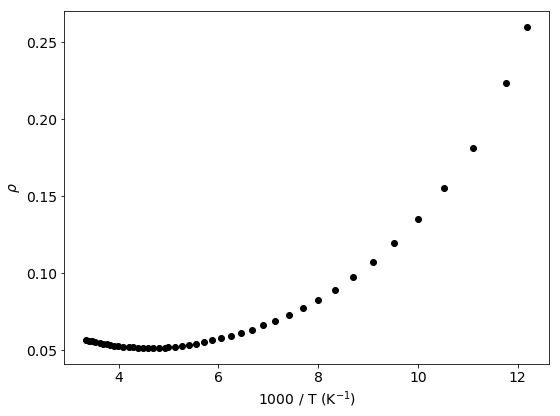

In [53]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(1000/T3, rho3, 'ko')
ax.set_xlabel('1000 / T (K$^{-1}$)', fontsize=14)
ax.set_ylabel(r'$\rho$', fontsize=14)
plt.tight_layout()

Mobility $\mu$

In [54]:
mu3 = np.abs(R_H3) / rho3

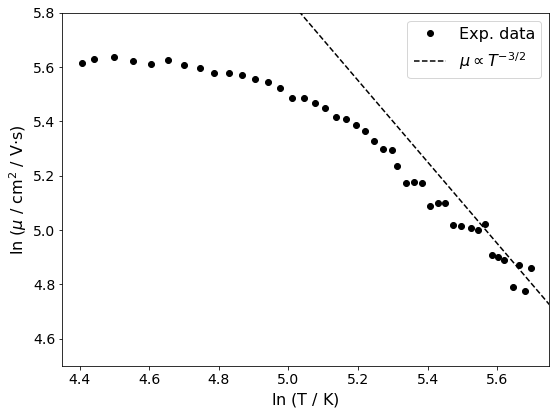

In [82]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(np.log(T3), np.log(mu3), 'ko', label='Exp. data')
t = np.linspace(80,320,10)
y = 13.35 -3/2 * np.log(t)
ax.plot(np.log(t), y, 'k--', label=r'$\mu\propto T^{-3/2}$')
ax.set_xlabel(r'$\ln$ (T / K)', fontsize=16)
ax.set_ylabel(r'$\ln$ ($\mu$ / cm$^2$ / V·s)', fontsize=16)
#ax.set_yticks(np.arange(2,4,.15))
ax.set_xbound(4.35,5.75)
ax.set_ybound(4.5, 5.8)
ax.legend(loc=0, fontsize=16)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Hall_mobility')

Save data

In [75]:
data_final = pd.DataFrame(data={'Temperature':T3,
                                'Hall_Voltage':U_Hall3,
                                'R_mn_op':R_mn_op3,
                                'R_no_pm':R_no_pm3,
                                'Hall_coefficient':R_H3,
                                'carrier_density':p3,
                                'resistivity':rho3,
                                'mobility':mu3})
#data_final.to_csv('final_dataset.csv', index=False)